## Prep

In [28]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np
from time import time
from torch.utils.data import Dataset

In [29]:
def plot_accuracy_loss(training_results): 
    plt.subplot(2, 1, 1)
    plt.plot(training_results['training_loss'], 'r')
    plt.ylabel('loss')
    plt.title('training loss iterations')
    plt.subplot(2, 1, 2)
    plt.plot(training_results['validation_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epochs')   
    plt.show()

In [30]:
def show_data1(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap='gray')
    plt.title('y = ' + str(data_sample[1]))
    plt.show()

In [31]:
def show_data(data_sample,y):
    plt.subplot(1,2,1)
    plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(data_sample[1].numpy().reshape(28, 28), cmap='gray')
    plt.title('y = ' + str(y))

    plt.show()

## Data pairing

In [32]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),])
trainset = dsets.MNIST(root='./../data', 
                            train=True, 
                            download=True, 
                            transform=transform)
valset = dsets.MNIST(root='./../data', 
                            train=False, 
                            download=True, 
                            transform=transform)

In [33]:
print(len(trainset))
#print(trainset[1])
# a tuple of a tensor with the image and its lable
print(trainset[1][0].shape)
print(trainset[1][1])

60000
torch.Size([1, 28, 28])
0


In [34]:
print(len(valset))
#print(trainset[1])
# a tuple of a tensor with the image and its lable
print(valset[1][0].shape)
print(valset[1][1])

10000
torch.Size([1, 28, 28])
2


In [35]:
def get_same_index(target, label):
    label_indices = []

    for i in range(len(target)):
        if target[i] == label:
            label_indices.append(i)

    return label_indices

In [36]:
indices = []
for i in range(5):
    indlist = get_same_index(trainset.targets,i)
    indices.append(indlist)
indicesv = []
for i in range(5):
    indlist = get_same_index(valset.targets,i)
    indicesv.append(indlist)
len(indices)

5

In [37]:
print(len(indices[0]))
print(len(indicesv[0]))

5923
980


In [38]:
subsets = []
[subsets.append(torch.utils.data.Subset(trainset, i)) for i in indices]
subsetsv = []
[subsetsv.append(torch.utils.data.Subset(valset, i)) for i in indicesv]
print(subsets)
print(subsetsv)

[<torch.utils.data.dataset.Subset object at 0x105b7bd00>, <torch.utils.data.dataset.Subset object at 0x105b7ba30>, <torch.utils.data.dataset.Subset object at 0x105b7b6d0>, <torch.utils.data.dataset.Subset object at 0x105b7be80>, <torch.utils.data.dataset.Subset object at 0x105b7bb20>]
[<torch.utils.data.dataset.Subset object at 0x105b7b4c0>, <torch.utils.data.dataset.Subset object at 0x105b7bdc0>, <torch.utils.data.dataset.Subset object at 0x105b7b1c0>, <torch.utils.data.dataset.Subset object at 0x105b7bac0>, <torch.utils.data.dataset.Subset object at 0x120bfe040>]


In [39]:
comp = []
for indi in range(len(indices) - 1):
    comp.append(int(min(len(subsets[indi]), len(subsets[indi+1]))))
tot1 = sum(comp)

compv = []
for indi in range(len(indicesv) - 1):
    compv.append(int(min(len(subsetsv[indi]), len(subsetsv[indi+1]))))
tot1v = sum(compv)

print(tot1, tot1v)

23681 4004


In [40]:
x = torch.zeros([tot1,2,28,28], dtype=torch.float32)
print(x.shape)
y = []
# 1 for first pic greater, 0 for first pic less
k = 0
for i in range(len(subsets)-1):
    for j in range(int(comp[i]/2)):
        x[k][0] = subsets[i][j][0]
        x[k][1] = subsets[i+1][j][0]
        y.append(0)
        k+=1
    for j in range(int(comp[i]/2), comp[i]):
        x[k][1] = subsets[i][j][0]
        x[k][0] = subsets[i+1][j][0]
        y.append(1)
        k+=1
    
xv = torch.zeros([tot1v,2,28,28], dtype=torch.float32)
print(xv.shape)
yv = []
# 1 for first pic greater, 0 for first pic less
k = 0
for i in range(len(subsetsv)-1):
    for j in range(int(compv[i]/2)):
        xv[k][0] = subsetsv[i][j][0]
        xv[k][1] = subsetsv[i+1][j][0]
        yv.append(0)
        k+=1
    for j in range(int(compv[i]/2), compv[i]):
        xv[k][1] = subsetsv[i][j][0]
        xv[k][0] = subsetsv[i+1][j][0]
        yv.append(1)
        k+=1

torch.Size([23681, 2, 28, 28])
torch.Size([4004, 2, 28, 28])


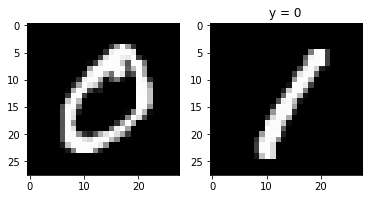

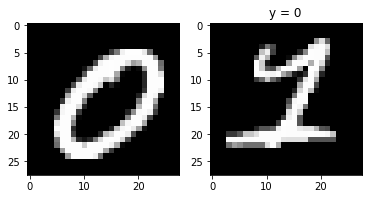

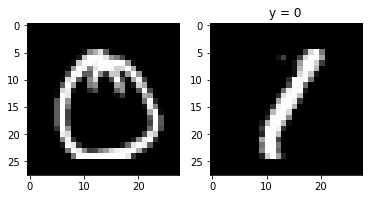

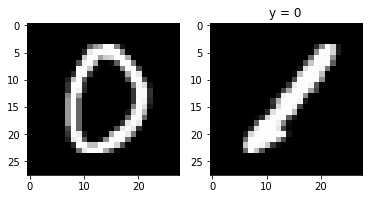

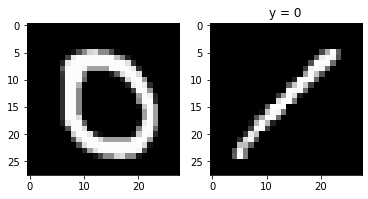

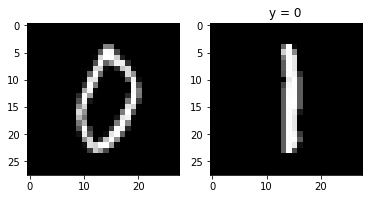

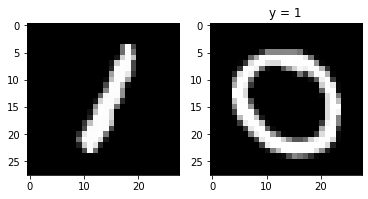

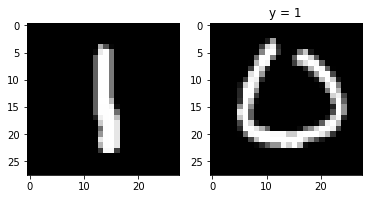

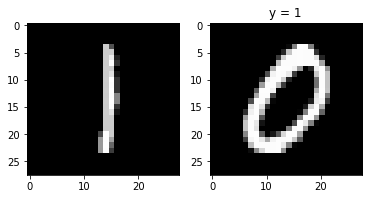

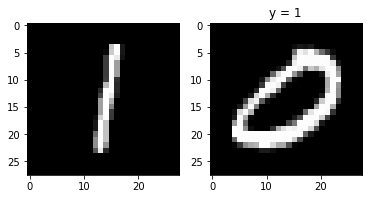

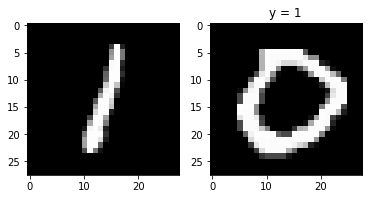

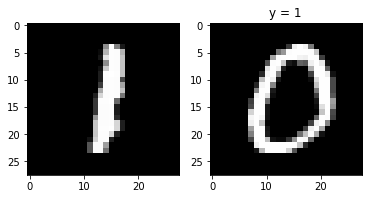

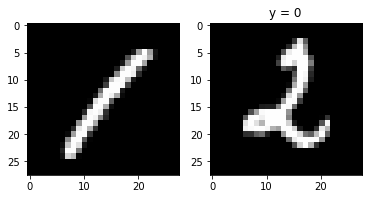

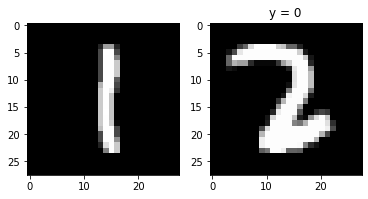

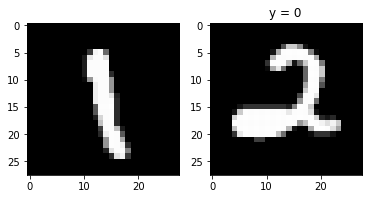

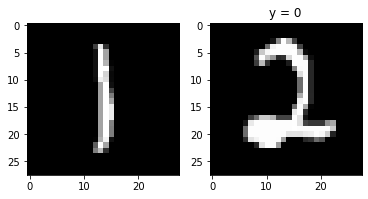

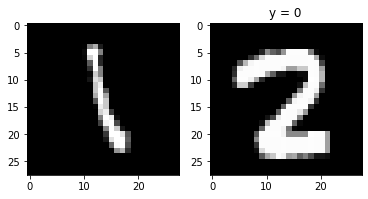

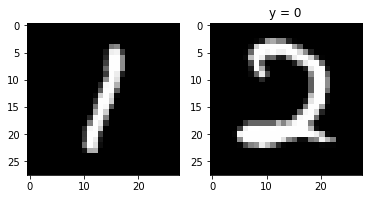

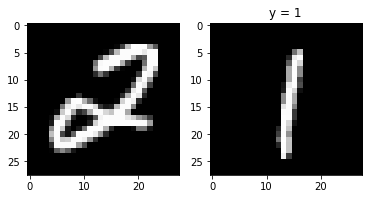

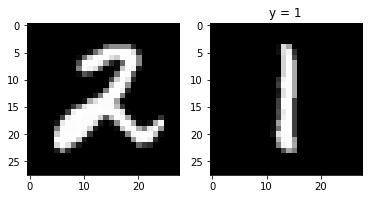

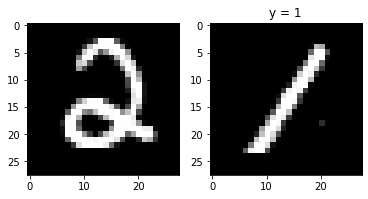

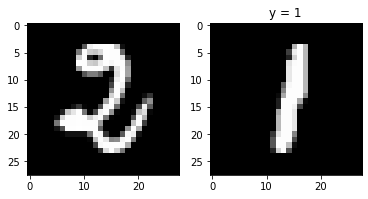

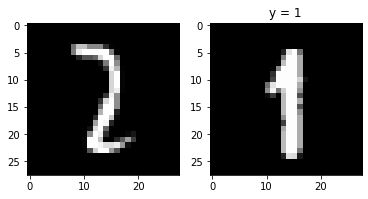

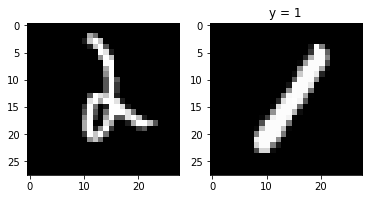

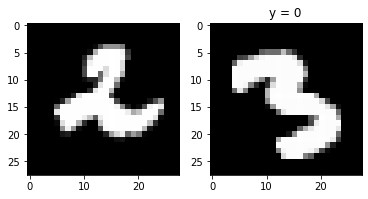

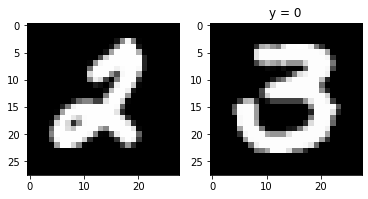

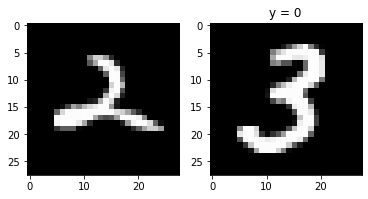

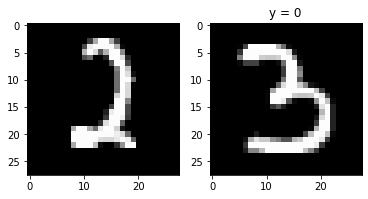

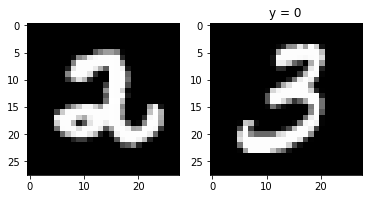

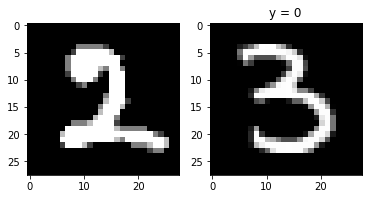

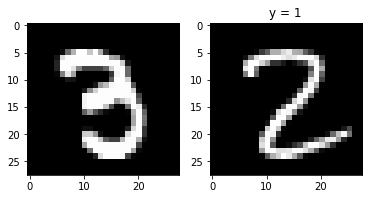

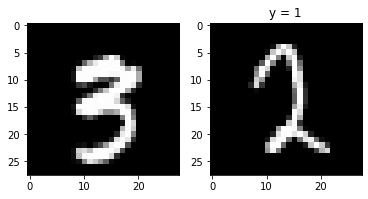

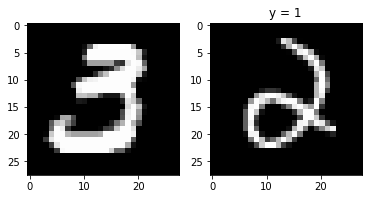

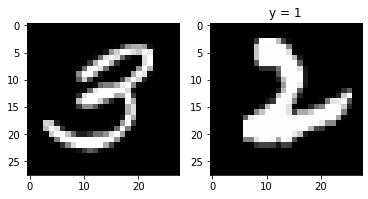

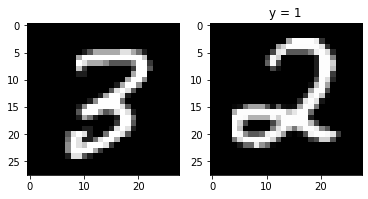

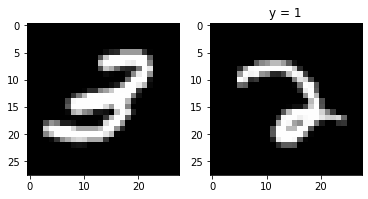

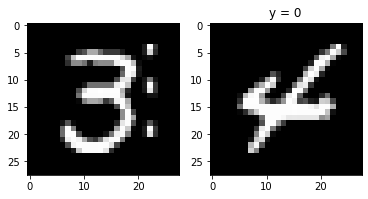

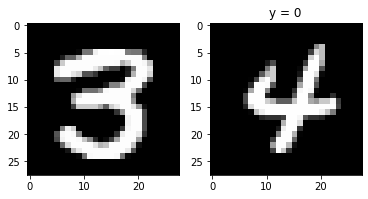

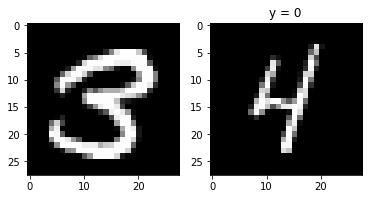

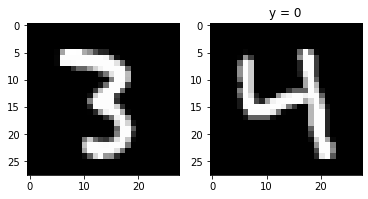

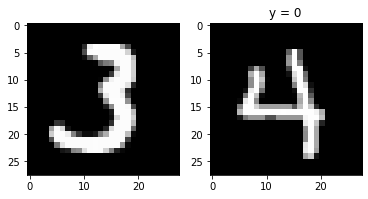

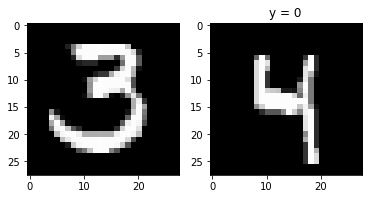

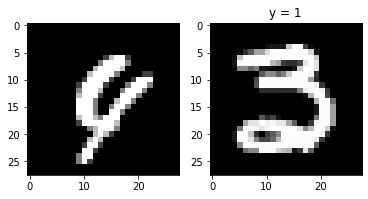

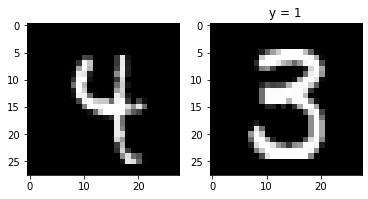

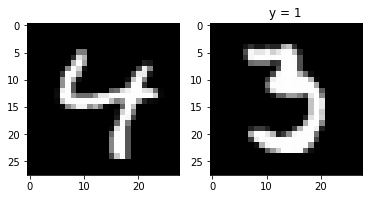

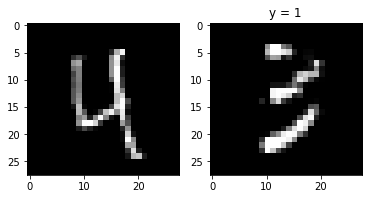

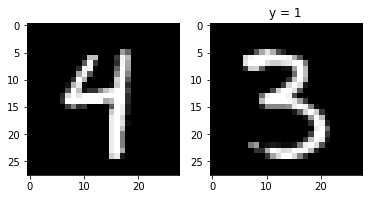

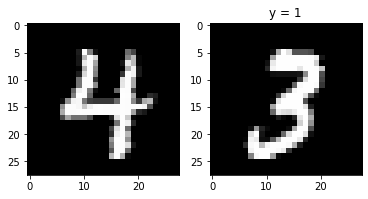

In [41]:
for i in range(0, x.shape[0],500):
    show_data(x[i],y[i])

In [15]:
#for i in range(0, xv.shape[0],500):
    #show_data(xv[i],yv[i])

In [42]:
class Trainsetcomp(Dataset):
    def __init__(self,x,y):
        self.len = (x.shape[0])
        self.x = x
        self.y = y
    def __getitem__(self,index):
        return (x[index], y[index])
    
    def __len__(self):
        return self.len
trainsetcomp = Trainsetcomp(x,y)
valsetcomp = Trainsetcomp(xv,yv)

torch.Size([2, 28, 28])
0


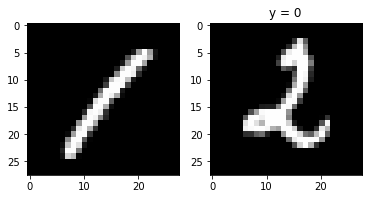

23681


In [44]:
print(trainsetcomp[0][0].shape)
print(trainsetcomp[0][1])
show_data(trainsetcomp[6000][0],trainsetcomp[6000][1])
len(trainsetcomp)== tot1
print(len(trainsetcomp))

torch.Size([2, 28, 28])
0


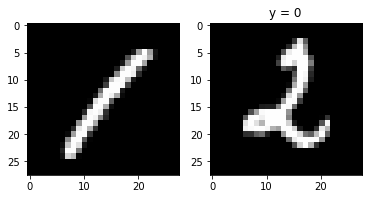

True

In [36]:
print(valsetcomp[0][0].shape)
print(valsetcomp[0][1])
show_data(valsetcomp[6000][0],valsetcomp[6000][1])
len(valsetcomp)== tot1v
#len(valsetcomp) == len(trainsetcomp)

In [37]:
trainloader = torch.utils.data.DataLoader(trainsetcomp, 
                                          batch_size=64, 
                                          shuffle=True)
valloader = torch.utils.data.DataLoader(valsetcomp, 
                                          batch_size=64, 
                                          shuffle=True)

## Training

In [38]:
def train(model,criterion,optimizer, epochs = 15):
    time0 = time()
    i = 0
    useful_stuff = {'training_loss': [],'validation_accuracy': []}  
    for epoch in range(epochs):
        running_loss = 0
        for images, labels in trainloader:
            i += 1
            # Flatten MNIST images into a 784 long vector
            images = images.view(-1, 2 * 28 * 28)

            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            useful_stuff['training_loss'].append(loss.data.item())
            running_loss += loss.item()
        correct = 0
        for x, y in valloader:
            #validation 
            z = model(x.view(-1, 2 * 28 * 28))
            _, label = torch.max(z, 1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct / len(valset))
        useful_stuff['validation_accuracy'].append(accuracy)
        print("Epoch",epoch, 'loss',running_loss/len(trainloader))
    print("\nTraining Time (in minutes) =",(time()-time0)/60)
    return useful_stuff

## Model 1

In [39]:
ind = 2 * 28 * 28
outd = 2
hd1 = 256
hd2 = 128

In [40]:
class Model(nn.Module):
    def __init__(self,ind, hd1, hd2, outd):
        super(Model, self).__init__()
        self.lin1 = nn.Linear(ind,hd1)
        self.lin2 = nn.Linear(hd1,hd2)
        self.lin3 = nn.Linear(hd2, outd)
    def forward(self,x):
        x = torch.relu(self.lin1(x))
        x = torch.relu(self.lin2(x))
        x = self.lin3(x)
        return x
model = Model(ind,hd1,hd2,outd)

In [41]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.03)

In [79]:
trainingloss1 = train(model,criterion,optimizer)

Epoch 0 loss 0.4100215788077151
Epoch 1 loss 0.14893681772798173
Epoch 2 loss 0.0965786880662607
Epoch 3 loss 0.07909535168455918
Epoch 4 loss 0.06938738335737321
Epoch 5 loss 0.06054872929839031
Epoch 6 loss 0.05679658305127741
Epoch 7 loss 0.04894078668894753
Epoch 8 loss 0.04673660611620831
Epoch 9 loss 0.03857104927790916
Epoch 10 loss 0.03413007874190355
Epoch 11 loss 0.030758877160162786
Epoch 12 loss 0.027533647134389227
Epoch 13 loss 0.025154617422378022
Epoch 14 loss 0.02021412007922352

Training Time (in minutes) = 0.2529075821240743


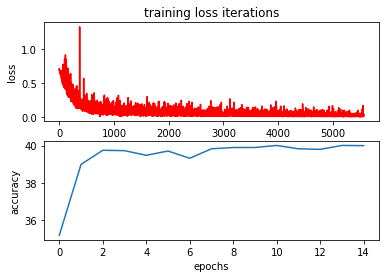

40.0

In [80]:
plot_accuracy_loss(trainingloss1)
acc = trainingloss1['validation_accuracy']
acc.pop()

## Model 2 - ignore incomplete

In [93]:
ind = 2 * 28 * 28
outd = 2
hd1 = 256
hd2 = 128

In [94]:
model2 = nn.Sequential(nn.Linear(ind, hd1),
                      nn.ReLU(),
                      nn.Linear(hd1, hd2),
                      nn.ReLU(),
                      nn.Linear(hd2, outd),
                      nn.LogSoftmax(dim=1))
print(model2)

Sequential(
  (0): Linear(in_features=1568, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=2, bias=True)
  (5): LogSoftmax()
)


In [102]:
criterion2 = nn.NLLLoss()
optimizer2 = torch.optim.SGD(model2.parameters(), lr=0.03)

In [103]:
trainingresults2 = train(model,criterion2,optimizer2)# doesnt makes sense

Epoch 0 loss -8.562765926042335
Epoch 1 loss -8.567450348579015
Epoch 2 loss -8.577836361856795
Epoch 3 loss -8.573726950951343
Epoch 4 loss -8.56721803248732
Epoch 5 loss -8.567385749354196
Epoch 6 loss -8.571397104031956
Epoch 7 loss -8.56202589533721
Epoch 8 loss -8.56411236765571
Epoch 9 loss -8.572159155359808
Epoch 10 loss -8.556797800038382
Epoch 11 loss -8.562521536073916
Epoch 12 loss -8.559517519814628
Epoch 13 loss -8.553159946379957
Epoch 14 loss -8.55983779629607

Training Time (in minutes) = 0.21746584971745808


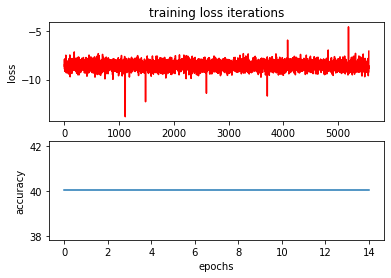

40.04

In [108]:
plot_accuracy_loss(trainingresults2)
acc = trainingresults2['validation_accuracy']
acc.pop()

## Model3 - adam optimizer

In [112]:
model3 = Model(ind,hd1,hd2,outd)
criterion3 = nn.CrossEntropyLoss()
optimizer3 = torch.optim.Adam(model3.parameters(), lr=0.03)

In [113]:
trainingresults3 = train(model3,criterion3,optimizer3, epochs = 30)

Epoch 0 loss 1.841678432578025
Epoch 1 loss 0.38573123815888666
Epoch 2 loss 0.3918216165627109
Epoch 3 loss 0.37295016815077586
Epoch 4 loss 0.3729916870935426
Epoch 5 loss 0.37423097243848835
Epoch 6 loss 0.3696951737421542
Epoch 7 loss 0.36926991815836924
Epoch 8 loss 0.3709524771816165
Epoch 9 loss 0.37137061554305956
Epoch 10 loss 0.6999888298003821
Epoch 11 loss 0.6942033160407588
Epoch 12 loss 0.6940033680023852
Epoch 13 loss 0.6940505305390474
Epoch 14 loss 0.6942824607268177
Epoch 15 loss 0.693538190380261
Epoch 16 loss 0.6941845752800893
Epoch 17 loss 0.6940944189973919
Epoch 18 loss 0.6937272622578871
Epoch 19 loss 0.69401693954622
Epoch 20 loss 0.6943265559538355
Epoch 21 loss 0.694421015338435
Epoch 22 loss 0.6945055605908931
Epoch 23 loss 0.6941811345979532
Epoch 24 loss 0.6939798548536481
Epoch 25 loss 0.694356080014108
Epoch 26 loss 0.6943226826158817
Epoch 27 loss 0.6944271658630062
Epoch 28 loss 0.6941706473936611
Epoch 29 loss 0.6942490480659465

Training Time (in mi

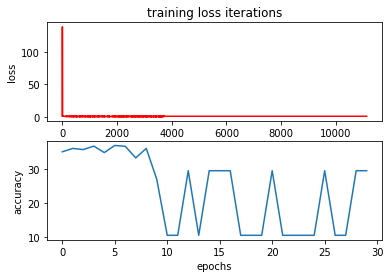

29.609999999999996

In [114]:
plot_accuracy_loss(trainingresults3)
acc = trainingresults3['validation_accuracy']
acc.pop()

## Momentum

In [48]:
ind = 2 * 28 * 28
outd = 2
hd1 = 128
hd2 = 64

In [49]:
model4 = Model(ind,hd1,hd2,outd)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.03, momentum = 0.9)

In [50]:
trainingresults4 = train(model4,criterion,optimizer)

Epoch 0 loss 0.6938771542834464
Epoch 1 loss 0.6937606153141135
Epoch 2 loss 0.6940062899152545
Epoch 3 loss 0.6939064076325964
Epoch 4 loss 0.6938051934833476
Epoch 5 loss 0.693601054162028
Epoch 6 loss 0.6937318050636435
Epoch 7 loss 0.693797234897665
Epoch 8 loss 0.6937809707019529
Epoch 9 loss 0.6939584834556374
Epoch 10 loss 0.6939539501287867
Epoch 11 loss 0.6938917183811774
Epoch 12 loss 0.693735680168851
Epoch 13 loss 0.693912634791711
Epoch 14 loss 0.693713541461451

Training Time (in minutes) = 0.15073781808217365


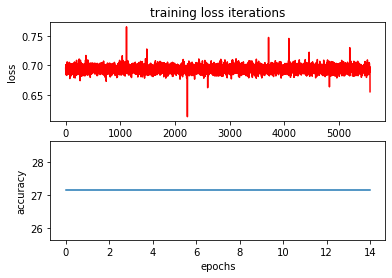

27.150000000000002

In [51]:
plot_accuracy_loss(trainingresults4)
acc = trainingresults4['validation_accuracy']
acc.pop()